In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241227_135805.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241227_135805.braidz using pyarrow


In [3]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              0   112425  1.735304e+09  0.062740 -0.217536  0.010097   
 1              0   112426  1.735304e+09  0.062729 -0.217541  0.010080   
 2              0   112427  1.735304e+09  0.062698 -0.217465  0.010102   
 3              0   112428  1.735304e+09  0.062652 -0.217259  0.009670   
 4              0   112429  1.735304e+09  0.062674 -0.217397  0.009801   
 ...          ...      ...           ...       ...       ...       ...   
 11206017  163130  8437004  1.735388e+09 -0.189298  0.125734 -0.000388   
 11206018  163130  8437005  1.735388e+09 -0.189342  0.126060  0.000289   
 11206019  163130  8437006  1.735388e+09 -0.189168  0.126198  0.000906   
 11206020  163130  8437007  1.735388e+09 -0.188991  0.126224  0.001211   
 11206021  163130  8437008  1.735388e+09 -0.188843  0.126186  0.001342   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.000305 -0.002747  0.000785

In [5]:
data = extract_stimulus_centered_data(df,csvs["opto"])
AngV1 = data["angular_velocity"]

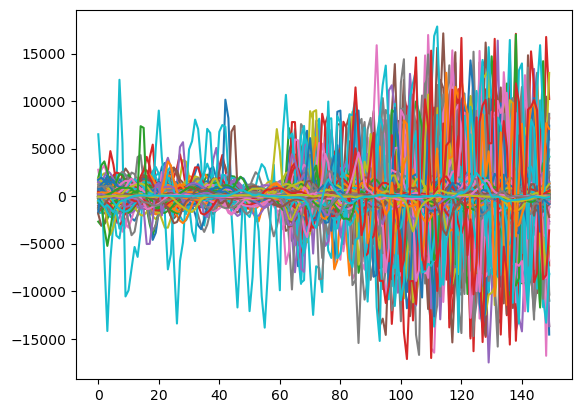

In [ ]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

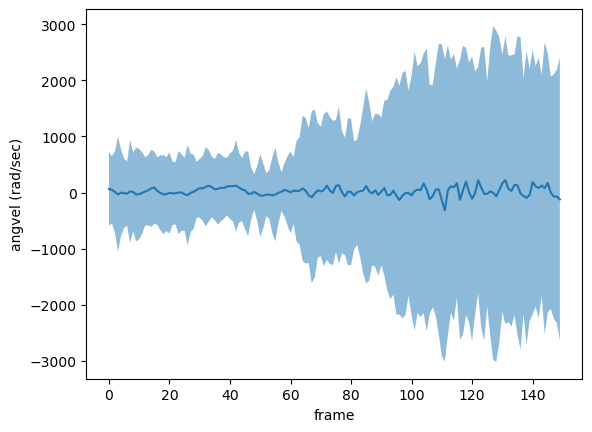

In [ ]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

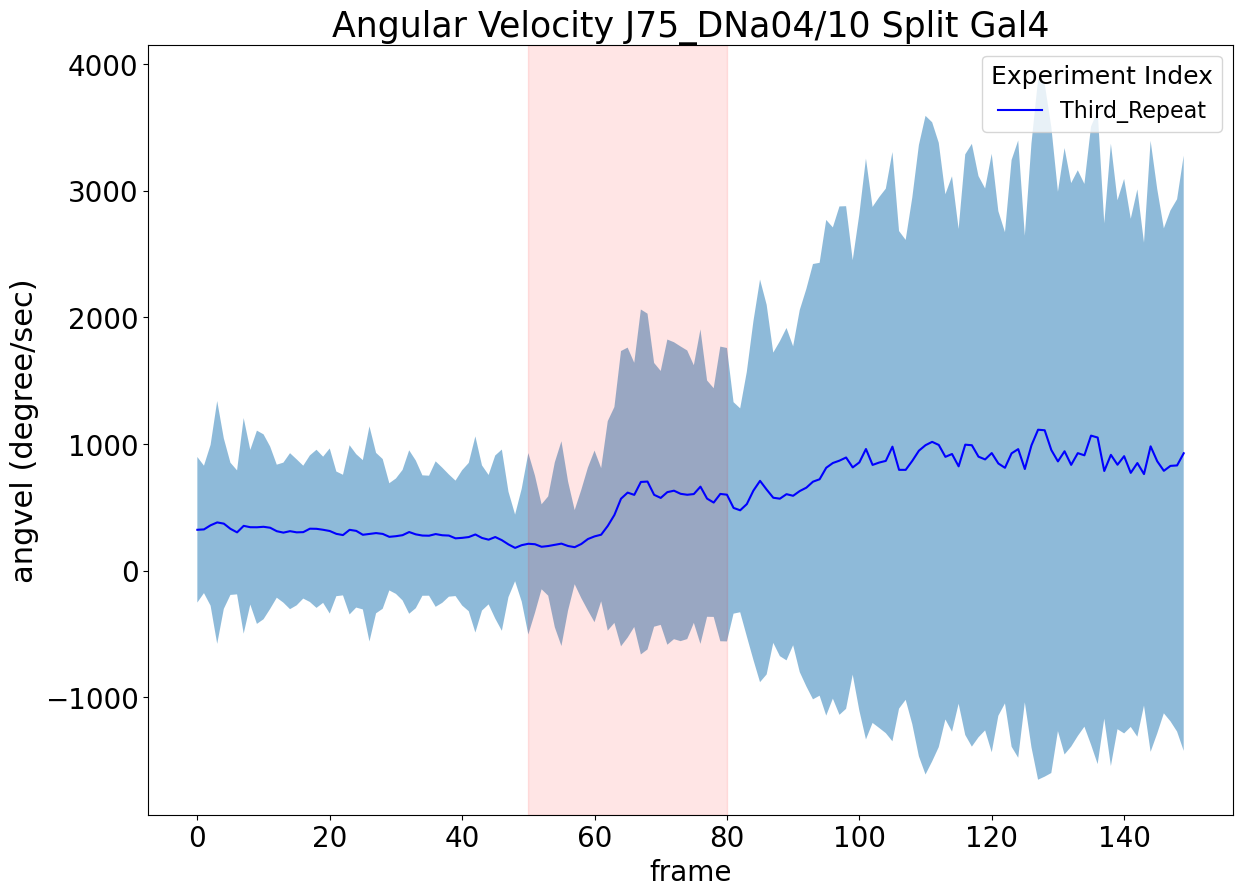

In [12]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax, label='Third_Repeat', color='blue')

ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J75_DNa04/10 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)


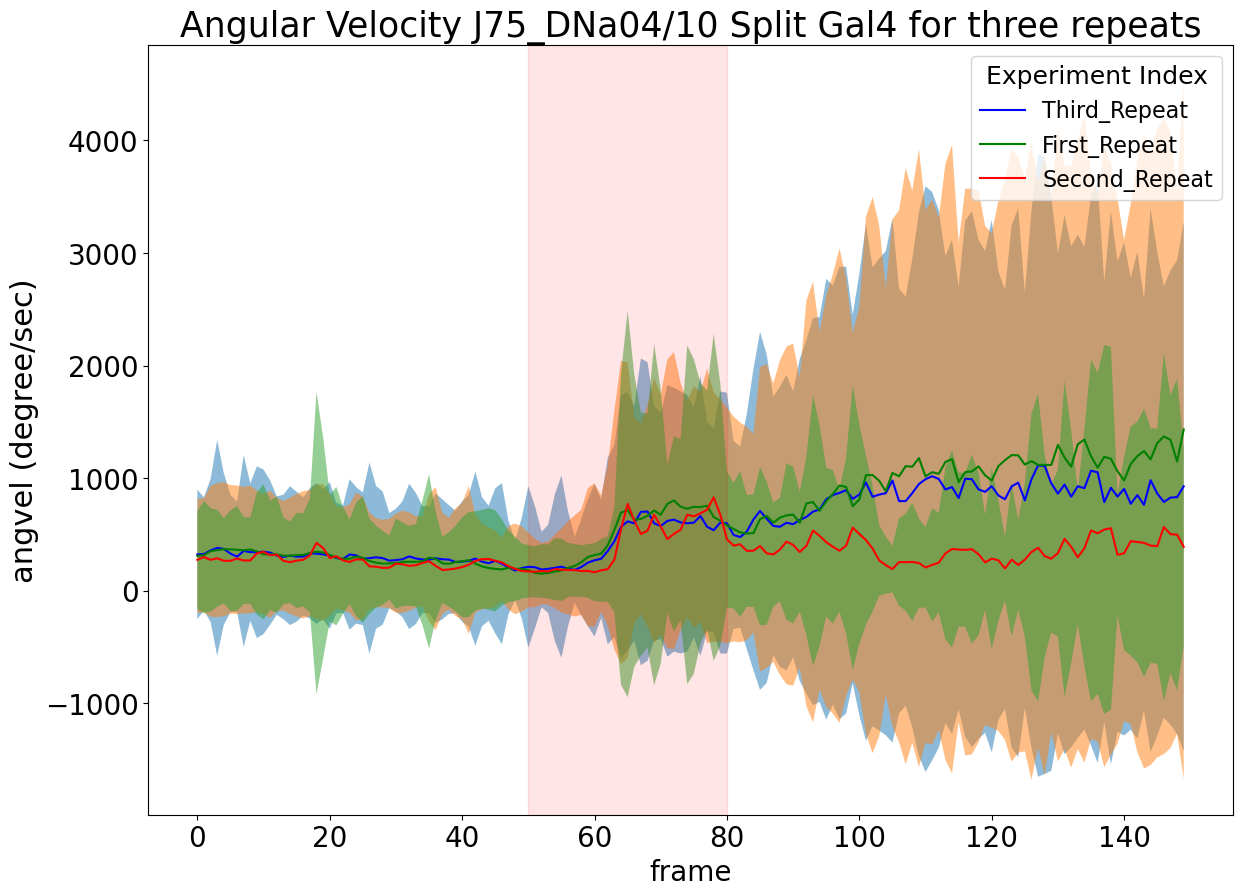

In [14]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax, label='Third_Repeat', color='blue')
plot_mean_and_std(np.abs(np.array(data1["angular_velocity"])), ax=ax, label='First_Repeat', color='green')
plot_mean_and_std(np.abs(np.array(data2["angular_velocity"])), ax=ax, label='Second_Repeat', color='red')

ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J75_DNa04/10 Split Gal4 for three repeats", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)


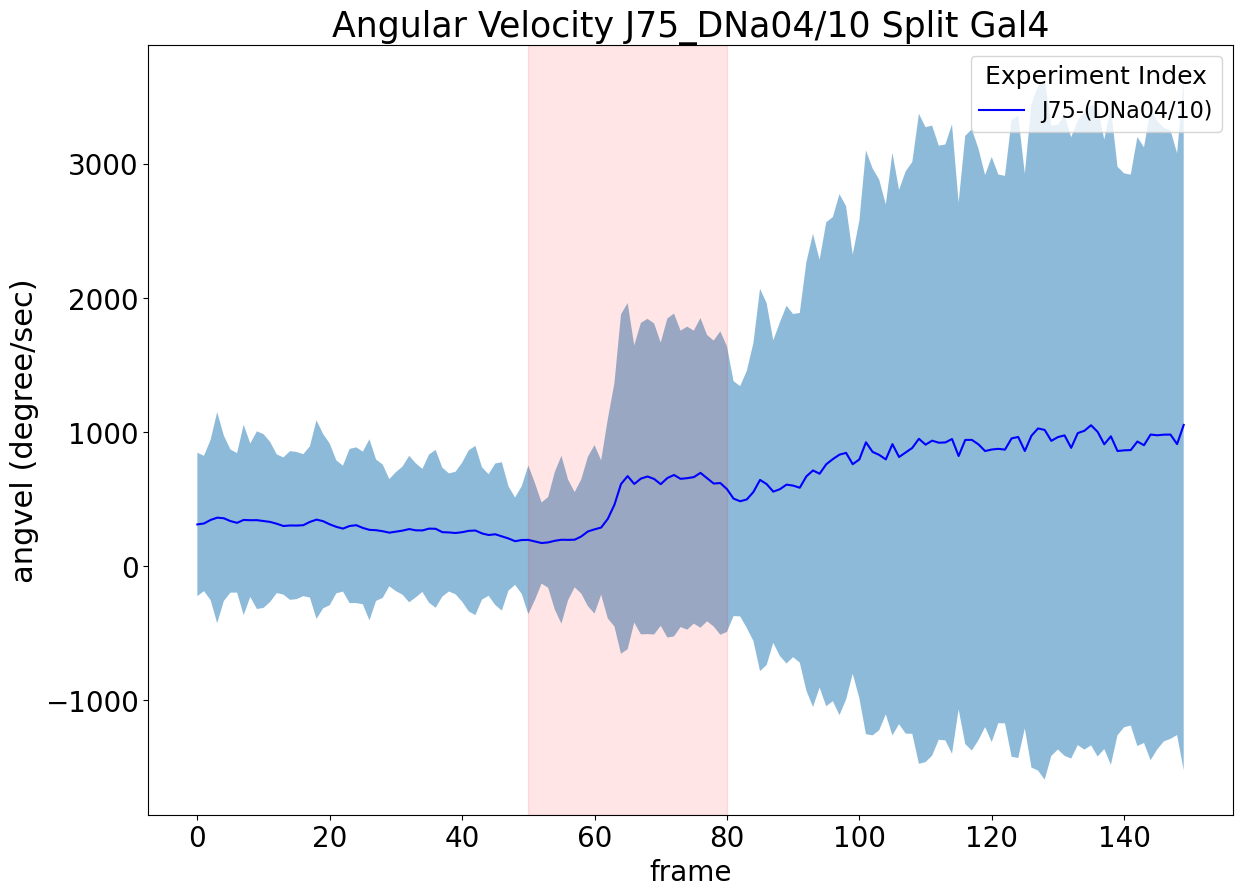

In [15]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(AngVel_J75_Split_Gal4), ax=ax, label='J75-(DNa04/10)', color='blue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J75_DNa04/10 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
